<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#IMPORTS" data-toc-modified-id="IMPORTS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>IMPORTS</a></span><ul class="toc-item"><li><span><a href="#GNUPLOT" data-toc-modified-id="GNUPLOT-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>GNUPLOT</a></span></li><li><span><a href="#Ex-Gaussian-Utilities" data-toc-modified-id="Ex-Gaussian-Utilities-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ex-Gaussian Utilities</a></span><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Example 2</a></span></li></ul></li></ul></li><li><span><a href="#Experimental-Data" data-toc-modified-id="Experimental-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experimental Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Import-Fixation-Data" data-toc-modified-id="Import-Fixation-Data-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Import Fixation Data</a></span></li><li><span><a href="#Create-Middle-and-First-Fixes-(group-and-individual)" data-toc-modified-id="Create-Middle-and-First-Fixes-(group-and-individual)-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Create Middle and First Fixes (group and individual)</a></span></li></ul></li><li><span><a href="#Individual-vs.-Group-First-Fix-RT" data-toc-modified-id="Individual-vs.-Group-First-Fix-RT-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Individual vs. Group First Fix RT</a></span></li><li><span><a href="#Individual-vs.-Group-Middle-Fix-RT" data-toc-modified-id="Individual-vs.-Group-Middle-Fix-RT-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Individual vs. Group Middle Fix RT</a></span></li></ul></li><li><span><a href="#Create-Fixation-Dists" data-toc-modified-id="Create-Fixation-Dists-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create Fixation Dists</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Individual-Fit" data-toc-modified-id="Individual-Fit-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Individual Fit</a></span></li><li><span><a href="#Check-actual-vs-sim-mean-RTs" data-toc-modified-id="Check-actual-vs-sim-mean-RTs-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Check actual vs sim mean RTs</a></span></li><li><span><a href="#Compare-Plots" data-toc-modified-id="Compare-Plots-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>Compare Plots</a></span></li><li><span><a href="#Save-Plot" data-toc-modified-id="Save-Plot-3.0.4"><span class="toc-item-num">3.0.4&nbsp;&nbsp;</span>Save Plot</a></span></li><li><span><a href="#Group-Fit" data-toc-modified-id="Group-Fit-3.0.5"><span class="toc-item-num">3.0.5&nbsp;&nbsp;</span>Group Fit</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3.0.6"><span class="toc-item-num">3.0.6&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#HISTOGRAM" data-toc-modified-id="HISTOGRAM-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>HISTOGRAM</a></span></li></ul></li></ul></div>

# IMPORTS

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os                                 # for os independent functions
import seaborn as sns                     # for kernal density estimation
import datetime as dt                     # for naming files
from scipy.special import expit           # for logistic function
from scipy.stats import binned_statistic  # for binning RT vals
from scipy import stats
import sys
import importlib                          # in order to reload edited modules
import itertools                          # for creating values list (for aDDM of all stimuli value combos)
import time
import shelve
import pickle
from tqdm import tqdm                     # for keeping track of progress
import pdb                                # for debugging use: pdb.set_trace()
import copy                               # to do deep copies

# display matplotlib graphs 
%matplotlib inline   
# %precision %.8f check on this...

print(sys.version)

2.7.12 |Anaconda custom (x86_64)| (default, Jul  2 2016, 17:43:17) 
[GCC 4.2.1 (Based on Apple Inc. build 5658) (LLVM build 2336.11.00)]


## GNUPLOT

In [3]:
from Gnuplot import Gnuplot as gplot
from Gnuplot import Data as gdata
from Gnuplot import Func as gfunc
g = gplot(persist = 1)

## Ex-Gaussian Utilities

In [2]:
from ExGUtils.uts import stats, drand, drand_exp, drand_gauss, drand_exg
from ExGUtils.uts import *

### Example 1

In [65]:
N = 1000000
mu = 100.; sig = 50.; tau = 150.
li1 = [drand() for ii in xrange(N)]
li2 = [drand_exp(tau) for ii in xrange(N)]
li3 = [drand_gauss(mu, sig) for ii in xrange(N)]
li4 = [drand_exg(mu, sig , tau) for ii in xrange(N)]

# After each result , the expected value in parenthesis

[M, S, t] = stats(li1, True) 

print "Homogeneous:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, 0.5 , S, (1./12)**.5 , t, 0.)

print "Exponential:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, tau , S, tau , t, 2)

print "Gaussian:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, mu , S, sig , t, 0.)

print "Ex-Gaussian:_M=%4.4f_(%4.4f)__S=%4.4f_(%4.4f)___t=%4.4f_(%4.4f)" %\
(M, mu+tau , S, (sig**2+tau**2)**.5 , t, 2.*(tau**3)/((sig**2+tau**2)**(3./2.)))



Homogeneous:_M=0.5003_(0.5000)__S=0.2886_(0.2887)___t=-0.0003_(0.0000)
Exponential:_M=0.5003_(150.0000)__S=0.2886_(150.0000)___t=-0.0003_(2.0000)
Gaussian:_M=0.5003_(100.0000)__S=0.2886_(50.0000)___t=-0.0003_(0.0000)
Ex-Gaussian:_M=0.5003_(250.0000)__S=0.2886_(158.1139)___t=-0.0003_(1.7076)


### Example 2

In [3]:
mu = 450. 
sig = 140. 
tau = 160.
xi = [drand_exg(mu, sig , tau) for ii in xrange(300)]


In [42]:
[xx, yy] = histogram(xi , norm=1)
[mcs, scs, tcs] =minSQR(xx, yy)
[mlk, slk, tlk] =maxLKHD(xi)

ycs = [exgauss(x, mcs, scs, tcs) for x in xx]
ylk = [exgauss(x, mlk, slk, tlk) for x in xx]

d1 = gdata(xx, yy, with_="boxes", title="Histogram")
d2 = gdata(xx, ycs, with_="lines lw 2", title="minSQR")
d3 = gdata(xx, ylk, with_="lines lw 2", title="maxLKHD")

g.plot(d1, d2, d3)

print "by maxLKHD: mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mlk, slk , tlk)
print "by minSQR : mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mcs, scs , tcs)


by maxLKHD: mu=483.5864 , sig=172.0481 , tau=126.7244
by minSQR : mu=461.4211 , sig=128.9106 , tau=172.6467


# Experimental Data

### Import Fixation Data

In [3]:
fixations = pd.read_csv("../../MADE_niagara/data/made_v2/fixations.csv")

### Create Middle and First Fixes (group and individual)

In [4]:
np.unique(fixations.parcode)

array([ 1,  3,  7,  8,  9, 11, 12, 15, 18, 19, 23, 29, 30, 31, 32, 33, 35,
       36, 37, 38, 39, 41, 43])

In [5]:
# GROUP
group_first_fix = fixations['fix_time'][fixations['fix_num']==1]
group_mid_fix = fixations['fix_time'][(fixations['fix_num']>1) & (fixations['rev_fix_num']>1)]

In [6]:
# INDIVIDUAL
subj_first_fix = {}
subj_mid_fix = {}

for i in np.unique(fixations.parcode):
    subj_first_fix[i] = fixations['fix_time'][(fixations['fix_num']==1) & (fixations['parcode']==i)]
    subj_mid_fix[i] = fixations['fix_time'][(fixations['fix_num']>1) & (fixations['rev_fix_num']>1) & (fixations['parcode']==i)]
    
    subj_first_fix[i] = np.asarray(subj_first_fix[i], dtype=np.int16) # keeps it smaller...values up to 32000
    subj_mid_fix[i] =  np.asarray(subj_mid_fix[i], dtype=np.int16)

In [7]:
fixations.head()

,Unnamed: 0,parcode,trial,fix_item,fix_time,fix_num,rev_fix_num
0,0,1,1,2,2850.349235,1,6
1,1,1,1,1,1233.176509,2,5
2,2,1,1,2,433.403406,3,4
3,3,1,1,1,433.219029,4,3
4,4,1,1,2,1233.325697,5,2


In [8]:
grouped = fixations.groupby('parcode')


In [9]:
subj_first_fix[1].sem()


AttributeError: 'numpy.ndarray' object has no attribute 'sem'

In [10]:
# First Fixation
parcode = []
first_fix_mean = []
first_fix_sem = []
mid_fix_mean = []
mid_fix_sem = []

for subject, subject_data in grouped:
    parcode.append(subject)
    first_fix_mean.append(subject_data.fix_time[subject_data.fix_num==1].mean())
    first_fix_sem.append(subject_data.fix_time[subject_data.fix_num==1].sem())
    mid_fix_mean.append(subject_data.fix_time[(subject_data.fix_num>1) & (subject_data.rev_fix_num>1)].mean())
    mid_fix_sem.append(subject_data.fix_time[(subject_data.fix_num>1) & (subject_data.rev_fix_num>1)].sem())


In [11]:
fix_df = pd.DataFrame(
    {'subject': parcode,
     'first_fix_mean': first_fix_mean,
     'first_fix_sem': first_fix_sem,
     'mid_fix_mean': mid_fix_mean,
     'mid_fix_sem': mid_fix_sem
    })


In [12]:
fix_df.head()


,first_fix_mean,first_fix_sem,mid_fix_mean,mid_fix_sem,subject
0,1090.045539,51.932134,959.203733,35.661796,1
1,759.135110,48.079921,958.895330,27.699928,3
2,581.674742,25.100458,1993.624838,287.979926,7
3,825.557328,44.542549,983.645981,44.327489,8
4,826.477506,40.212693,845.862021,23.738707,9


## Individual vs. Group First Fix RT

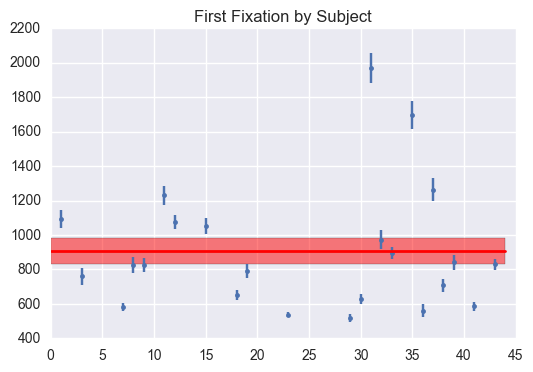

In [16]:
group_first_fix_mean = np.repeat(fix_df.first_fix_mean.mean(), 45, axis=0)
group_first_fix_sem = np.repeat(fix_df.first_fix_mean.sem(), 45, axis=0)
x = np.arange(45)

plt.errorbar(fix_df.subject, fix_df.first_fix_mean, fix_df.first_fix_sem, linestyle='None', marker='.')
plt.plot(x, group_first_fix_mean, lw=2, label='mean population 1', color='red')
plt.fill_between(x, group_first_fix_mean+group_first_fix_sem, group_first_fix_mean-group_first_fix_sem,
                 facecolor='red', alpha=0.5)
plt.title('First Fixation by Subject')


plt.show()


## Individual vs. Group Middle Fix RT

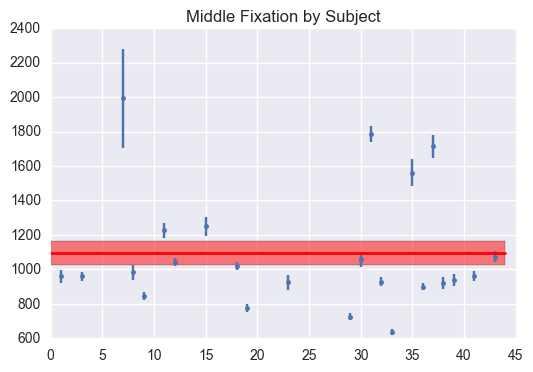

In [17]:
group_mid_fix_mean = np.repeat(fix_df.mid_fix_mean.mean(), 45, axis=0)
group_mid_fix_sem = np.repeat(fix_df.mid_fix_mean.sem(), 45, axis=0)
x = np.arange(45)

plt.errorbar(fix_df.subject, fix_df.mid_fix_mean, fix_df.mid_fix_sem, linestyle='None', marker='.')
plt.plot(x, group_mid_fix_mean, lw=2, label='mean population 1', color='red')
plt.fill_between(x, group_mid_fix_mean+group_mid_fix_sem, group_mid_fix_mean-group_mid_fix_sem,
                 facecolor='red', alpha=0.5)
plt.title('Middle Fixation by Subject')

plt.show()

In [18]:
print "MEAN"
print subj_mid_fix[1].mean()
print "LENGTH"
print len(subj_mid_fix[1])

subj_mid_fix[1].head()

MEAN
959.203732994
LENGTH
376


1    1233.176509
2     433.403406
3     433.219029
4    1233.325697
7    1183.183932
Name: fix_time, dtype: float64

# Create Fixation Dists

### Individual Fit

Create first/middle fixation dicts with arrays of samples for each subject

In [51]:
%%time
first_fix_synth_dist = {}
N = 100000 # number of samples

for sub in subj_first_fix.keys():
    x = subj_first_fix[sub].tolist()
    [mlk, slk, tlk] =maxLKHD(x)
    sample = [drand_exg(mlk, slk , tlk) for ii in xrange(N)]
    sample = np.asarray(sample, dtype=np.int16)
    sample = sample[sample>10] # removing samples less than 10ms (some were negative...)
    print(len(sample))
    first_fix_synth_dist[sub] = sample
    
mid_fix_synth_dist = {}
N = 1000000 # number of samples

for sub in subj_mid_fix.keys():
    x = subj_mid_fix[sub].tolist()
    [mlk, slk, tlk] =maxLKHD(x)
    sample = [drand_exg(mlk, slk , tlk) for ii in xrange(N)]
    sample = np.asarray(sample, dtype=np.int16) # keeps it smaller...values up to 32000
    sample = sample[sample>10] # removing samples less than 10ms (some were negative...)
    print(len(sample))
    mid_fix_synth_dist[sub] = sample

100000
98265
100000
100000
100000
99995
100000
99999
100000
100000
99999
100000
100000
100000
99998
100000
100000
99999
100000
99902
100000
98776
100000
999017
999999
1000000
1000000
999999
999910
999964
999976
1000000
1000000
999405
999659
999998
999998
999995
999984
1000000
1000000
999999
999948
999989
997400
999998
CPU times: user 21.4 s, sys: 1.04 s, total: 22.5 s
Wall time: 23.6 s


How much memory is it taking up:

In [53]:
sys.getsizeof(mid_fix_synth_dist[1])/1000000.

1.99813

In [61]:
pickle.dump( first_fix_synth_dist, open( "first_fix_synth_dist.p", "wb" ) )
pickle.dump( mid_fix_synth_dist, open( "mid_fix_synth_dist.p", "wb" ) )

### Check actual vs sim mean RTs

In [24]:
fix_compare = np.empty([len(subj_mid_fix.keys()), 4])
i = 0
for sub in subj_mid_fix.keys():
    
    fix_compare[i, 0] = np.mean(subj_first_fix[sub]).astype(int)
    fix_compare[i, 1] = np.mean(first_fix_synth_dist[sub]).astype(int)
    fix_compare[i, 2] = np.mean(subj_mid_fix[sub]).astype(int)
    fix_compare[i, 3] = np.mean(mid_fix_synth_dist[sub]).astype(int)
    i+=1

In [25]:
pd.DataFrame(fix_compare, columns=['first_sub', 'first_synth', 'mid_sub', 'mid_synth'])

,first_sub,first_synth,mid_sub,mid_synth
0,1089.0,1088.0,958.0,959.0
1,758.0,763.0,958.0,958.0
2,581.0,580.0,1993.0,2257.0
3,825.0,825.0,983.0,982.0
4,825.0,827.0,845.0,844.0
5,1228.0,1227.0,1225.0,1225.0
6,1074.0,1075.0,1042.0,1042.0
7,1050.0,1048.0,1249.0,1248.0
8,651.0,650.0,1017.0,1017.0
9,791.0,793.0,776.0,775.0


Convert to DFs

In [26]:
# Synth Dists
first_fix_df = pd.DataFrame.from_dict(first_fix_synth_dist)
mid_fix_df = pd.DataFrame.from_dict(mid_fix_synth_dist)

# Actual Dists
subj_first_fix_df = pd.DataFrame.from_dict(subj_first_fix, orient="index").T
subj_mid_fix_df = pd.DataFrame.from_dict(subj_mid_fix, orient="index").T

Convert to Long Format

In [27]:
# Synth dists
first_fix_df_long = pd.melt(first_fix_df)
first_fix_df_long = first_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})

mid_fix_df_long = pd.melt(mid_fix_df)
mid_fix_df_long = mid_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})

# Actual dists
# first fix
subj_first_fix_df_long = pd.melt(subj_first_fix_df)
subj_first_fix_df_long = subj_first_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})
subj_first_fix_df_long = subj_first_fix_df_long.dropna() # remove NA rows

# middle fix
subj_mid_fix_df_long = pd.melt(subj_mid_fix_df)
subj_mid_fix_df_long = subj_mid_fix_df_long.rename(index=str, columns={"variable": "subject", "value": "time"})
subj_mid_fix_df_long = subj_mid_fix_df_long.dropna() # remove NA rows

In [28]:
for i in first_fix_synth_dist.keys():
    min_fix = min(first_fix_synth_dist[i])
    min_fix_actual = min(subj_first_fix[i])
    print("Synth sub {} min: {}".format(i, min_fix))
    print("Actual sub {} min: {}".format(i, min_fix_actual))


Synth sub 1 min: 118
Actual sub 1 min: 0
Synth sub 3 min: -2
Actual sub 3 min: 0
Synth sub 7 min: 188
Actual sub 7 min: 250
Synth sub 8 min: 120
Actual sub 8 min: 200
Synth sub 9 min: 58
Actual sub 9 min: 133
Synth sub 11 min: -29
Actual sub 11 min: 200
Synth sub 12 min: 149
Actual sub 12 min: 233
Synth sub 15 min: 1
Actual sub 15 min: 183
Synth sub 18 min: 64
Actual sub 18 min: 150
Synth sub 19 min: 141
Actual sub 19 min: 217
Synth sub 23 min: 0
Actual sub 23 min: 0
Synth sub 29 min: 134
Actual sub 29 min: 183
Synth sub 30 min: 185
Actual sub 30 min: 233
Synth sub 31 min: 347
Actual sub 31 min: 550
Synth sub 32 min: -7
Actual sub 32 min: 199
Synth sub 33 min: 58
Actual sub 33 min: 183
Synth sub 35 min: 138
Actual sub 35 min: 283
Synth sub 36 min: -4
Actual sub 36 min: 50
Synth sub 37 min: 148
Actual sub 37 min: 311
Synth sub 38 min: -157
Actual sub 38 min: 16
Synth sub 39 min: 172
Actual sub 39 min: 233
Synth sub 41 min: -343
Actual sub 41 min: 0
Synth sub 43 min: 269
Actual sub 43 mi

In [29]:
# add column to differentiate versions
first_fix_df_long['version'] = "synth"
mid_fix_df_long['version'] = "synth"
subj_first_fix_df_long['version'] = "actual"
subj_mid_fix_df_long['version'] = "actual"

# append
full_long_first = pd.concat([first_fix_df_long, subj_first_fix_df_long])
full_long_mid = pd.concat([mid_fix_df_long, subj_mid_fix_df_long])

### Compare Plots

In [32]:
sns.set_context("talk", font_scale=1.4)
# paper, # poseter

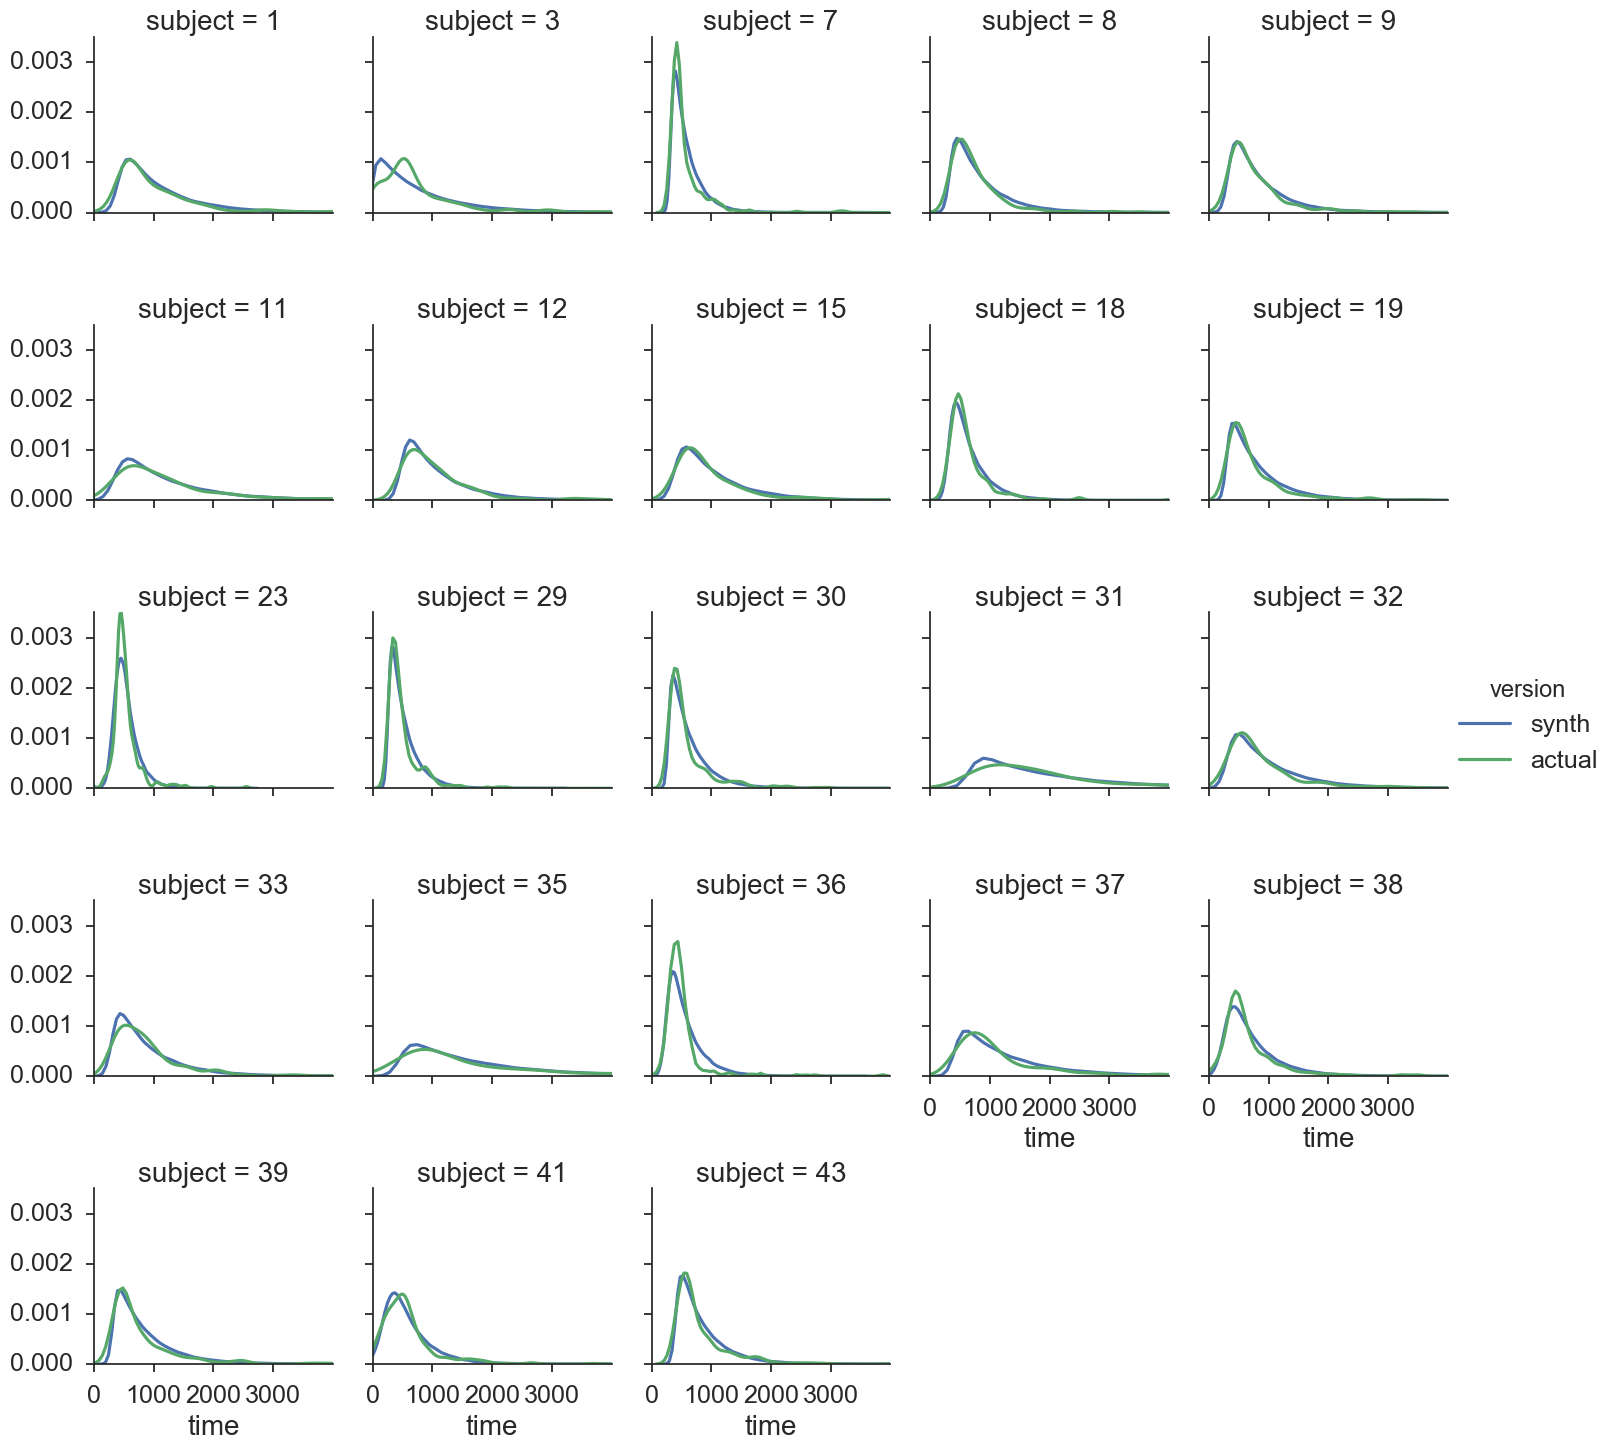

In [42]:
sns.set_style("ticks")
compare = sns.FacetGrid(full_long_first, col = "subject", hue="version", col_wrap=5)
sns.plt.xlim(0, 4000)
plt.xticks([0, 1000, 2000, 3000])
plt.yticks([0, 0.0010, 0.0020, 0.0030])
#plt.xlabel('Time (ms)', fontsize=6)
compare = compare.map(sns.kdeplot, "time").add_legend()

### Save Plot

In [43]:
compare.savefig("plots/first_fix_compare.png", bbox_inches='tight')

In [367]:
np.sum(subj_first_fix[1]<250)

1

In [361]:
len(subj_first_fix[1]<250)

289

Checking for fast responses on first fixations:

In [50]:
for i in subj_first_fix.keys():
    fast = np.sum(subj_first_fix[i]<10) # /float(len(subj_first_fix[i])) * 100
    print('Sub {}: {:.3f}%'.format(i, fast))

Sub 1: 1.000%
Sub 3: 4.000%
Sub 7: 0.000%
Sub 8: 0.000%
Sub 9: 0.000%
Sub 11: 0.000%
Sub 12: 0.000%
Sub 15: 0.000%
Sub 18: 0.000%
Sub 19: 0.000%
Sub 23: 1.000%
Sub 29: 0.000%
Sub 30: 0.000%
Sub 31: 0.000%
Sub 32: 0.000%
Sub 33: 0.000%
Sub 35: 0.000%
Sub 36: 0.000%
Sub 37: 0.000%
Sub 38: 0.000%
Sub 39: 0.000%
Sub 41: 3.000%
Sub 43: 0.000%


Checking for fast responses on middle fixations:

In [372]:
for i in subj_mid_fix.keys():
    fast = np.sum(subj_mid_fix[i]<250)/float(len(subj_mid_fix[i])) * 100
    print('Sub {}: {:.3f}%'.format(i, fast))

Sub 1: 3.457%
Sub 3: 0.367%
Sub 7: 0.000%
Sub 8: 0.538%
Sub 9: 0.583%
Sub 11: 0.000%
Sub 12: 0.189%
Sub 15: 0.000%
Sub 18: 0.000%
Sub 19: 1.126%
Sub 23: 1.235%
Sub 29: 2.424%
Sub 30: 0.000%
Sub 31: 0.000%
Sub 32: 0.227%
Sub 33: 1.198%
Sub 35: 0.000%
Sub 36: 0.000%
Sub 37: 0.000%
Sub 38: 0.697%
Sub 39: 0.000%
Sub 41: 2.621%
Sub 43: 0.000%


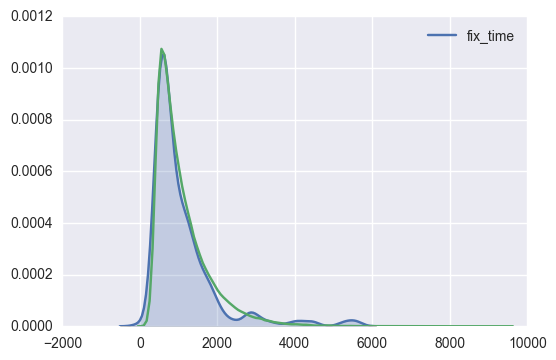

In [262]:
sns.kdeplot(subj_first_fix[1], shade=True)
sns.kdeplot(first_fix_synth_dist[1])

In [190]:
i = 11

In [191]:
np.mean(subj_mid_fix[i])

1226.4373740015196

In [192]:
np.mean(mid_fix_synth_dist[i])

1227.1614320281276

In [193]:
np.mean(subj_first_fix[i])

1229.4138273045533

In [194]:
np.mean(first_fix_synth_dist[i])

1230.1126394548369

In [66]:
xi = subj_mid_fix[34].values.tolist()

In [67]:
[xx, yy] = histogram(xi , norm=1)
[mcs, scs, tcs] =minSQR(xx, yy)
[mlk, slk, tlk] =maxLKHD(xi)

ycs = [exgauss(x, mcs, scs, tcs) for x in xx]
ylk = [exgauss(x, mlk, slk, tlk) for x in xx]

d1 = gdata(xx, yy, with_="boxes", title="Histogram")
d2 = gdata(xx, ycs, with_="lines lw 2", title="minSQR")
d3 = gdata(xx, ylk, with_="lines lw 2", title="maxLKHD")

g.plot(d1, d2, d3)

print "by maxLKHD: mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mlk, slk , tlk)
print "by minSQR : mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mcs, scs , tcs)

by maxLKHD: mu=729.9912 , sig=164.7501 , tau=832.4415
by minSQR : mu=674.1818 , sig=80.1272 , tau=794.4531


### Group Fit

In [33]:
xi_group = group_mid_fix.values.tolist()

In [34]:
# group fit
[xx_group, yy_group] = histogram(xi_group , norm=1)
[mcs, scs, tcs] =minSQR(xx_group, yy_group)
[mlk, slk, tlk] =maxLKHD(xi_group)

ycs_group = [exgauss(x, mcs, scs, tcs) for x in xx_group]
ylk_group = [exgauss(x, mlk, slk, tlk) for x in xx_group]

print "by maxLKHD: mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mlk, slk , tlk)
print "by minSQR : mu=%3.4f , sig=%3.4f , tau=%3.4f"%(mcs, scs , tcs)

by maxLKHD: mu=453.5634 , sig=157.6098 , tau=561.5854
by minSQR : mu=498.4341 , sig=203.4021 , tau=443.8988


### Plot

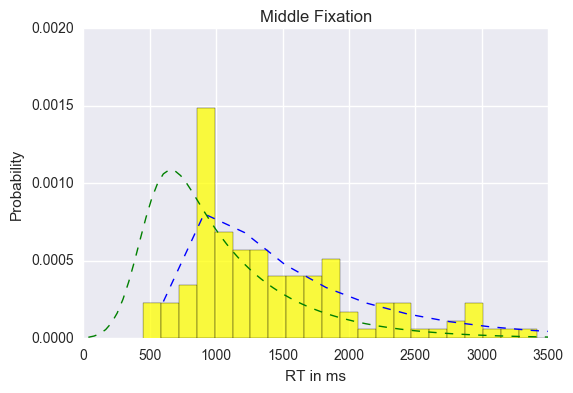

In [61]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# the histogram of the data
n, bins, patches = plt.hist(xi, 50, normed=1, facecolor='yellow', alpha=0.75)

# add a 'best fit' line
#l = plt.plot(xx, ycs, 'r--', linewidth=1) # least squares
l2 = plt.plot(xx, ylk, 'b--', linewidth=1) # max likelihood
l_group = plt.plot(xx_group,ylk_group, 'g--', linewidth=1)

plt.xlabel('RT in ms')
plt.ylabel('Probability')
plt.title('Middle Fixation')
plt.axis([0, 3500, 0, 0.002])

plt.show()


In [68]:
N = 1000000
mu = mlk
sig = slk
tau = tlk
sample = [drand_exg(mu, sig , tau) for ii in xrange(N)]

In [90]:
sample[900003]

952.004550423029

[(0, 4000)]

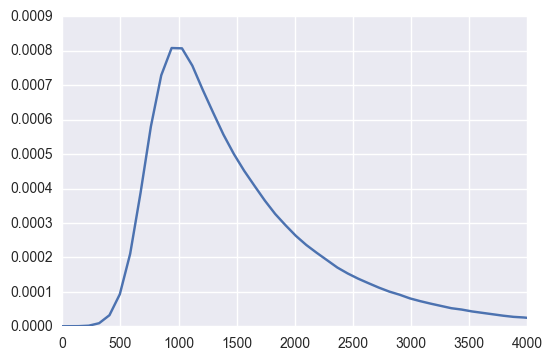

In [91]:
g = sns.kdeplot(np.asarray(sample))
g.set(xlim=(0, 4000))

## HISTOGRAM

In [46]:
N = 10000
mu = 100.; sig = 50.; tau = 150.

li4 = [drand_exg(mu, sig , tau) for ii in xrange(N)]

[x, y] = histogram(li4 , norm=1)

y2 = [exgauss(xi, mu, sig, tau) for xi in x]
d1 = gdata(x, y2, with_="lines lw 3 lc 1", title="exgaussian") 
d2 = gdata(x, y, with_="boxes lc 3", title="histogram") 
g.plot(d1, d2)

M, S, t = stats(li4, 1)
print "Li4 stats : M = %f , S = %f , t = %f "%(M, S, t)
[x, y] = histogram(li4 , norm=0)

M1, S1, t1 = stats_his(x, y, assymetry=True)
print "For norm=0 : M=%f, S =%f, t =%f sum(yi) =%f"%(M1, S1, t1, sum(y))
[x, y] = histogram(li4 , norm=-1)

M1, S1, t1 = stats_his(x, y, assymetry=1, norm=-1, N=N)
print "For norm=−1: M=%f, S =%f, t =%f sum(yi) =%f"%(M1, S1, t1, sum(y))
[x, y] = histogram(li4 , norm=1)

M1, S1, t1 = stats_his(x, y, assymetry=1, norm=1, N=N)
print "For norm=1 : M = %f , S = %f , t = %f sum(yi∗dx) = %f"%(M1, S1, t1 , sum(y)*(x[1]-x[0]))


Li4 stats : M = 250.009063 , S = 158.059525 , t = 1.740103 
For norm=0 : M=249.985470, S =158.045049, t =1.738630 sum(yi) =10000.000000
For norm=−1: M=249.985470, S =158.045049, t =1.738630 sum(yi) =1.000000
For norm=1 : M = 249.985470 , S = 158.045049 , t = 1.738630 sum(yi∗dx) = 1.000000


In [9]:
%gnuplot inline


ERROR:root:Line magic function `%gnuplot` not found.
